# Sheet 01: Jacobsen Piecuch

## 1 Principal Component Analysis
Implement PCA from scratch, using only low-level libraries. Assume we have a data set consisting of N observations with p features, summarized in a data matrix $X \in \mathbb{R}^{p×N}$. The r first principal components correspond to the eigenvectors of the r largest eigenvalues of matrix $XX^T$. After implementing the method yourself, you will apply it to a realistic dataset consisting of simulated hadronic jets, as they are observed by the LHCb experiment at CERN.

**(a)** Implement PCA in python using numpy. Your final implementation should use the vectorized numpy
functions or broadcasting instead of loops. Do not assume that the input data is already centered.
Hint: numpy.linalg.eig

In [ ]:
import numpy as np 
from numpy import linalg 
import matplotlib.pyplot as plt

def center_data(x):
    'Function for centering the data by substracting the mean.'
    
    xc = x - np.mean(x, axis=1, keepdims=True)
    return xc

def find_pc(x):
    'Function for finding the principal component of the data.'
    eigenvalues, eigenvectors = np.linalg.eigh(x@x.transpose())

    idx = np.argsort(eigenvalues)[::-1] #argsort is in ascending order --> flip by indexing with [::-1]
    pc1 = eigenvectors[:, idx[0]]
    pc2 = eigenvectors[:, idx[1]]

    return pc1, pc2

def PCA(x):
    'Function for performing PCA on the data.'
    x_centered = center_data(x)
    pc1, pc2 = find_pc(x_centered)
    w = np.stack([pc1, pc2], axis=1)
    projected = w.T @ x_centered

    return projected


**(b)** Load the data using the code provided in the jupyter notebook. It consists of simulated measurements of dijets (sets of two jets, i.e. narrow cones of hadrons and other particles produced by the hadronization of a quark). Each sample belongs to one of three classes, originating either from a pair of light quarks (q), charm quarks (c) or bottom quarks (b). How many samples of each class are present in the dataset? What is the range of the different features in the dataset? Normalize them such that each feature has zero mean and unit variance over the samples. Hint: numpy.mean, numpy.std

In [2]:
a = np.load('data/dijet_features.npy')
np.shape(a)

(116, 2233)

In [3]:
b = np.load('data/dijet_labels.npy')
print(np.unique(b))
print(len(np.where(b==0)[0]))
print(len(np.where(b==1)[0]))
print(len(np.where(b==2)[0]))
print(np.min(a),np.max(a))

[0. 1. 2.]
999
864
370
-155073.08929859565 2728662.5177883604


In [4]:
a_norm = (a-np.mean(a, axis=1, keepdims=True))/np.std(a, axis=1, keepdims=True)
print(a_norm)

[[ 0.33210345  1.30007125  1.52759653 ... -1.36273098  0.90376974
   0.48255366]
 [-2.22471373 -2.14579852 -2.76593321 ...  0.64082471 -2.37736961
  -2.218198  ]
 [-0.56573743 -0.2162089  -0.48902423 ...  0.86217185 -0.67211634
  -0.96286893]
 ...
 [-0.16613756 -0.16613756 -0.16613756 ... -0.16613756 -0.16613756
  -0.16613756]
 [-0.16565627 -0.16565627 -0.16565627 ... -0.16565627 -0.16565627
  -0.16565627]
 [-0.16364375 -0.16364375 -0.16364375 ... -0.16364375 -0.16364375
  -0.16364375]]


In [5]:
c = np.load('data/dijet_features_normalized.npy')
np.shape(c)
print(c)

[[ 0.33210345  1.30007125  1.52759653 ... -1.36273098  0.90376974
   0.48255366]
 [-2.22471373 -2.14579852 -2.76593321 ...  0.64082471 -2.37736961
  -2.218198  ]
 [-0.56573743 -0.2162089  -0.48902423 ...  0.86217185 -0.67211634
  -0.96286893]
 ...
 [-0.16613756 -0.16613756 -0.16613756 ... -0.16613756 -0.16613756
  -0.16613756]
 [-0.16565627 -0.16565627 -0.16565627 ... -0.16565627 -0.16565627
  -0.16565627]
 [-0.16364375 -0.16364375 -0.16364375 ... -0.16364375 -0.16364375
  -0.16364375]]


**(c)** Use PCA to reduce the dimensionality of the data to two, such that every sample can be visualized as a point in a 2D scatter plot. Interpret the results; without coloring the points in the plot by class, can you discern distinct clusters? Now use the labels to color the points by their respective class. How well are the classes separated in the visualization?

In [6]:
a_pca = PCA(a_norm)

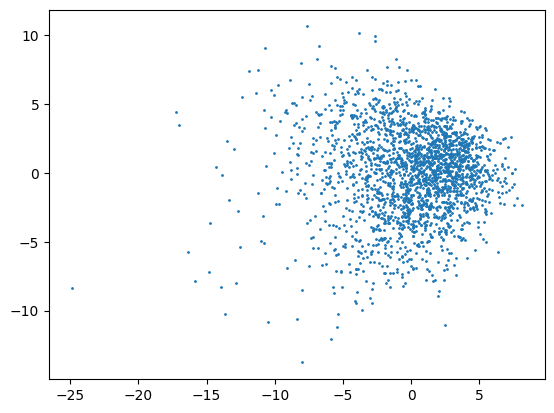

In [7]:
plt.scatter(a_pca[0,:], a_pca[1,:], s=1)
plt.show()

No resolution of different types yet

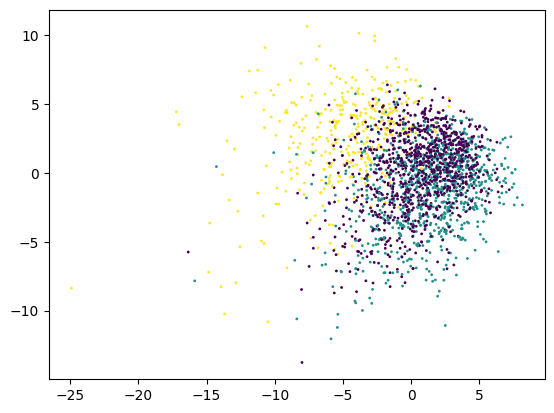

In [8]:
plt.scatter(a_pca[0,:], a_pca[1,:], c=b,cmap='viridis', s=1)
plt.show()

yellow quite on top, purple and blue mixed, no good cluster visible.

## 2 Robust PCA
Now look at the artificial two-dimensional data that contains an outlier.  You don’t need to center data in this exercise.

**(a)** Perform standard PCA and plot the first principal component in a scatter plot of the data.

In [9]:
robust_data = np.load('data/robust_pca_data.npy')

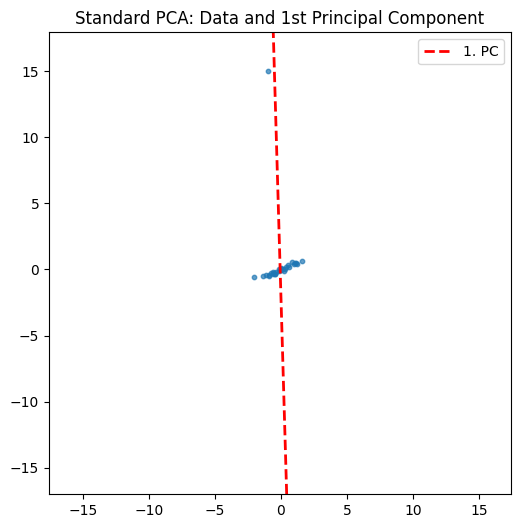

In [ ]:

pc1_vec, pc2_vec = find_pc(center_data(robust_data))

center = np.mean(robust_data, axis=1)            
v = pc1_vec                                      

# lim based on max. distance of points from center
lim = np.max(np.linalg.norm(robust_data - center[:, None], axis=0)) * 1.2

plt.figure(figsize=(6,6))
plt.scatter(robust_data[0, :], robust_data[1, :], s=10, alpha=0.7)

# plot first principal component as dashed line
pts = np.stack([center - v * lim, center + v * lim])   # shape (2,2)
plt.plot(pts[:, 0], pts[:, 1], 'r--', lw=2, label='1. PC')

ax = plt.gca()
ax.set_aspect('equal', 'box')

# set fixed axis limits based on lim
ax.set_xlim(center[0] - lim, center[0] + lim)
ax.set_ylim(center[1] - lim, center[1] + lim)

plt.legend()
plt.title('Standard PCA: Data and 1st Principal Component')
plt.show()

**(b)** Compute the first principal component in a robust way:  
Use the **Tukey potential** with a scale parameter of \( s = 1.5 \) on the distances,


$$T(r; s)=\begin{cases}
\dfrac{s^2}{6} \left[ 1 - \left( 1 - \left( \dfrac{r}{s} \right)^2 \right)^3 \right], & \text{for } |r| \le s, \\[1em]
\dfrac{s^2}{6}, & \text{for } |r| > s.
\end{cases}$$

Parameterize the line with the angle $\varphi$ to the $x$-axis. Plot the error as a function of $\varphi$. Interpret the two minima.  

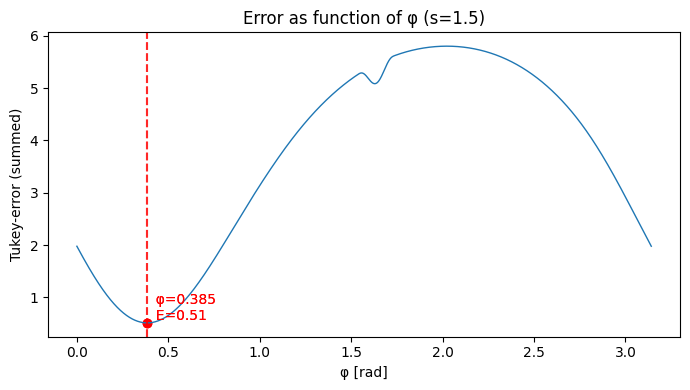

Minima (φ in rad): [0.38460786 0.38523631]
Error at Minima: [0.51310217 0.51310307]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

s = 1.5  # scale parameter für Tukey
phis = np.linspace(0, np.pi, 5000)  # Winkel im Bereich [0, π)

# vector orthagonal to line with angle φ: n = (-sin φ, cos φ)
# distances r(φ, i) = n(φ) · x_i  => matrix shape (len(phis), N)
r = (-np.sin(phis)[:, None]) * robust_data[0, None, :] + (np.cos(phis)[:, None]) * robust_data[1, None, :]

def tukey_potential(r, s):
    absr = np.abs(r)
    out = np.empty_like(r)
    mask = absr <= s
    out[mask] = (s**2 / 6.0) * (1.0 - (1.0 - (r[mask] / s)**2)**3)
    out[~mask] = (s**2 / 6.0)
    return out

T = tukey_potential(r, s)          # shape (len(phis), N)
error_phi = np.sum(T, axis=1)      # totale Fehler als Funktion von φ 

# find two minima with smallest error
idx_min = np.argsort(error_phi)[:2]
phi_min = phis[idx_min]
err_min = error_phi[idx_min]

# Plot Fehler vs φ and mark minima
plt.figure(figsize=(7,4))
plt.plot(phis, error_phi, lw=1)
plt.scatter(phi_min, err_min, color='red')
for p,e in zip(phi_min, err_min):
    plt.axvline(p, color='red', linestyle='--', alpha=0.6)
    plt.text(p, e, f'  φ={p:.3f}\n  E={e:.2f}', color='red', va='bottom')
plt.xlabel('φ [rad]')
plt.ylabel('Tukey-error (summed)')
plt.title('Error as function of φ (s=1.5)')
plt.tight_layout()
plt.show()

print('Minima (φ in rad):', phi_min)
print('Error at Minima:',err_min)

One minimum describes the data, one minimum is due to an outlier and tries to describe outlier best.

**(c)** Plot the potential in the scatter plot for the two minima $\varphi^*$.  

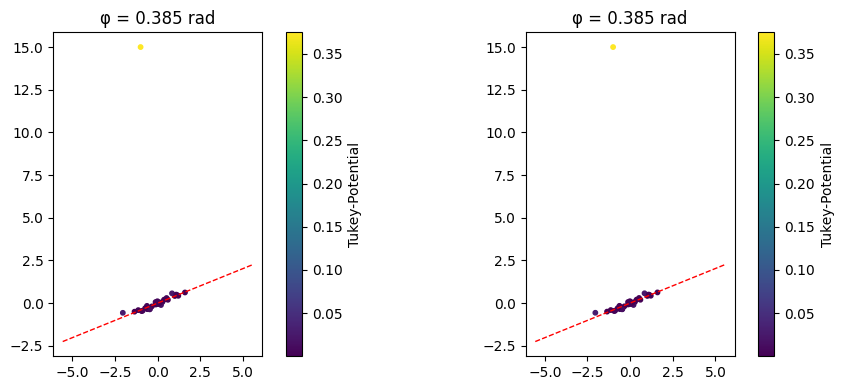

In [12]:

import numpy as np
import matplotlib.pyplot as plt

# Plot für beide Minima nebeneinander
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
lim = np.max(np.abs(robust_data)) * 0.4

for ax, phi in zip(axs.flat, phi_min):
    # normalvektor und Abstände
    n = np.array([-np.sin(phi), np.cos(phi)])
    r = n @ robust_data
    Tvals = tukey_potential(r, s)

    sc = ax.scatter(robust_data[0, :], robust_data[1, :], c=Tvals, cmap='viridis', s=10)
    ax.set_aspect('equal', 'box')
    ax.set_title(f'φ = {phi:.3f} rad')

    # Gerade (Richtung der Komponente) durch Ursprung: v = (cos φ, sin φ)
    v = np.array([np.cos(phi), np.sin(phi)])
    pts = np.stack([-v * lim, v * lim])
    ax.plot(pts[:, 0], pts[:, 1], 'r--', lw=1)

    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label('Tukey-Potential')

plt.tight_layout()
plt.show()
#